In [4]:
# PyTorch
from torchvision import transforms, datasets, models
import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
import torch.nn as nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Imagenes
from skimage import io

import os

In [23]:
dir = 'archive'
train_dir = 'Training'
test_dir = 'Testing'

#la red vgg16 unicamenta acepta imagenes de 224x224
data_transforms = {
    train_dir: transforms.Compose([
        # Data augmentation is a good practice for the train set
        # Here, we randomly crop the image to 224x224 and
        # randomly flip it horizontally. 
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]),
    test_dir: transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])
}

image_datasets = {
    x: datasets.ImageFolder(
        os.path.join(dir, x), 
        transform=data_transforms[x]
    )
    for x in [train_dir, test_dir]
}

dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=8,
        shuffle=True, num_workers=4
    )
    for x in [train_dir, test_dir]
}

dataset_sizes = {x: len(image_datasets[x]) for x in [train_dir, test_dir]}

for x in [train_dir, test_dir]:
    print("Loaded {} images under {}".format(dataset_sizes[x], x))
    
print("Classes: ")
class_names = image_datasets[train_dir].classes
print(image_datasets[train_dir].classes)

Loaded 5712 images under Training
Loaded 1311 images under Testing
Classes: 
['glioma', 'meningioma', 'notumor', 'pituitary']


Las dimensiones son:
(512, 512, 3)


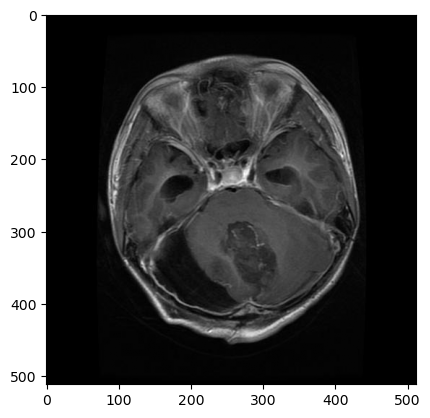

In [13]:
image=io.imread("archive/Testing/glioma/Te-glTr_0000.jpg")/255.0 

print("Las dimensiones son:")
print(image.shape)
plt.imshow(image,vmin=0,vmax=1)

In [3]:
!